# 政治資料文字探勘
### 主要目的：探討在1124選前，高雄兩位主要候選人-陳其邁、韓國瑜，在社群網站上發文內容的操作
#### 方法：利用文字雲找出兩位候選人分別較關心的議題，再比較在同議題下，兩位候選人的態度為何

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import jieba
import numpy as np
from collections import Counter
import pandas as pd
import math as ma
df = pd.read_csv("/Users/jen/Downloads/201901_data 拷貝.xls")
df=df[['Date','Page_Name','LIKE_COUNT','Message']]
df.head(5)

,Date,Page_Name,LIKE_COUNT,Message
0,2019/01/01 01:00:49,柯文哲,44256,2018的風雨都過去了，台灣向前走，我們迎向2019。
1,2019/01/01 17:59:00,udn.com 聯合新聞網,29018,韓國瑜感嘆：「我們好多人好久好久沒有愛自己的國家了！」\n \n#元旦 #韓國瑜 #國旗
2,2019/01/01 11:54:52,韓國瑜,28943,【2019第一道曙光】\n\n當2019年的第一道曙光在朝雨綿綿裡，從大武山的山顛出發，照亮...
3,2019/01/01 00:01:48,韓國瑜,25439,【2019新年新希望】\n\n各位好朋友們，2019新年快樂！\n\n不知道各位2018的願...
4,2019/01/01 00:48:38,udn.com 聯合新聞網,23037,「是台灣所有縣市跨年晚會人數最多的」，不得了～～～\n \n#韓國瑜 #夢時代 #跨年


In [2]:
df.iloc[-3:]

,Date,Page_Name,LIKE_COUNT,Message
43663,2019/01/31 18:25:01,笨蛋，我愛你,0,人家做善事也要嫌....\n真的蠻莫名其妙的
43664,2019/01/31 20:37:37,男人心裡那點事兒,0,NaN
43665,2019/01/31 11:17:51,MyGoNews不動產網路新聞粉絲團,0,🗣🗣盧秀燕 允諾完整發展豐原在地建設與生活🏗🏘\n\n#台中市長盧秀燕 自1月起啟動「#行動...


In [3]:
df.shape

(43666, 4)

In [4]:
s='/Users/jen/Downloads/20180{n}_data 拷貝.xlsx'
t='/Users/jen/Downloads/2018{n}_data 拷貝.xlsx'
for i in range(1,10):
    df2=pd.read_csv(s.format(n=i))
    df2=df2[['Date','Page_Name','LIKE_COUNT','Message']]
    df=df.append(df2)
for i in range(10,13):
     df2=pd.read_csv(t.format(n=i))
     df2=df2[['Date','Page_Name','LIKE_COUNT','Message']]
     df=df.append(df2)
df.shape

(410913, 4)

In [5]:
df=df.dropna(axis=0,how='any')
df.shape

(364613, 4)

In [6]:
df.iloc[-10:]

,Date,Page_Name,LIKE_COUNT,Message
51089,2018/12/31 21:25:00,讚起來吧,0,地獄級交換禮物，\n如果是你抽到哪一個會直接爆走？\n#交換禮物
51090,2018/12/31 07:08:03,ღ那些愛情 心情語錄ღ,0,驗票第4天！法官動用「放大鏡、手電筒」查到底 「目前票數差距」讓丁守中臉綠了
51091,2018/12/31 11:25:00,ღ 有本事、就和我天长地久 ღ,0,根本完全沒變啊！\n\n#童顏\n#凍齡
51092,2018/12/31 17:15:01,指傳媒 Fingermedia,0,【記者張世昌／台中報導】 台中市政府今(31)晚同步於麗寶樂園第二停車場及圓滿戶外劇場暨文心...
51093,2018/12/31 12:25:00,可愛動物愛很大,0,有神快拜XD\n\n#韓國瑜\n#果菜
51094,2018/12/31 15:15:03,PChome新聞,0,韓國瑜稱「2020有個相公胡不了牌」 羅友志推測是「他」
51095,2018/12/31 15:10:00,Life is a gift,0,「凍蒜」高雄市市長的韓國瑜在日前公開表示，在爭取逐步開放陸資來高雄的過程中，也希望能夠包括買...
51096,2018/12/31 15:10:00,Beautiful Life,0,「凍蒜」高雄市市長的韓國瑜在日前公開表示，在爭取逐步開放陸資來高雄的過程中，也希望能夠包括買...
51097,2018/12/31 15:40:58,指傳媒 Fingermedia,0,【記者彭慧婉/桃園報導】桃園市長鄭文燦日前在中壢區，出席「2018聖誕送暖‧有你陪伴」亞洲廣...
51098,2018/12/31 11:07:51,省錢特快車,0,旅館一晚350元？黃偉哲：輔導轉型非削價競爭\n#鐵道大飯店


In [13]:
subset_chen=df[df['Page_Name'] == '陳其邁 Chen Chi-Mai']
subset_chen.shape

(617, 4)

In [7]:
subset_han=df[df['Page_Name'] == '韓國瑜']
subset_han.shape

(329, 4)

### 清洗資料，做斷詞和停詞

#### 陳其邁的文字雲

In [15]:
text_for_chen=subset_chen['Message']

In [17]:
with open('/Users/jen/Desktop/sentence_chen.txt', 'w')as f:
    for i in text_for_chen:
        i=i.strip('\n')
        f.write(i)

In [22]:
#設定字典
jieba.set_dictionary(r'/Users/jen/Downloads/jieba-zh_TW-master-2/jieba/dict.txt')
#設定自訂的字典
jieba.load_userdict(r'/Users/jen/Downloads/dic_me.txt')

Building prefix dict from /Users/jen/Downloads/jieba-zh_TW-master-2/jieba/dict.txt ...
Dumping model to file cache /var/folders/cj/rct4y7s563xfycgmg0fgb5j00000gn/T/jieba.ud5c7fb17df94e9d47058587936fdcd55.cache
Loading model cost 0.698 seconds.
Prefix dict has been built succesfully.


In [23]:
#設定停用詞
with open(r'/Users/jen/Downloads/stop_word.txt', 'r', encoding='utf8') as f:  
    stops = f.read().split('\n') 

In [25]:
filename=open("/Users/jen/Desktop/sentence_chen.txt")
final=""
s=filename.read()
terms = [t for t in jieba.cut(s, cut_all=True) if t not in stops]
sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

[('\n', 2561),
 ('高雄', 2345),
 ('\n\n', 2209),
 ('陳其邁', 1209),
 ('未來', 605),
 ('產業', 545),
 ('市長', 521),
 ('台灣', 479),
 ('高雄市', 461),
 ('發展', 451),
 ('邁', 422),
 ('城市', 409),
 ('智慧', 387),
 ('經濟', 318),
 ('成為', 301),
 ('支持', 295),
 ('相信', 260),
 ('朋友', 240),
 ('年', 236),
 ('會', 235),
 ('今天', 234),
 ('說', 228),
 ('市民', 218),
 ('推動', 216),
 ('參選', 198),
 ('國際', 197),
 ('打造', 195),
 ('文化', 192),
 ('表示', 187),
 ('選人', 186),
 ('轉型', 184),
 ('地方', 181),
 ('生活', 181),
 ('\n#', 181),
 ('觀光', 178),
 ('看好', 176),
 ('一起', 175),
 ('中', 174),
 ('https', 174),
 ('中心', 171),
 ('更', 170),
 ('com', 169),
 ('line', 168),
 ('官方', 167),
 ('科技', 166),
 ('園區', 165),
 ('挺', 162),
 ('在地', 160),
 ('政府', 156),
 ('議員', 156),
 ('市場', 148),
 ('共同', 144),
 ('加速', 141),
 ('希望', 138),
 ('世界', 138),
 ('解決', 137),
 ('感謝', 137),
 ('新', 137),
 ('服務', 137),
 ('委員', 134),
 ('時', 133),
 ('問題', 133),
 ('建設', 133),
 ('做', 131),
 ('機會', 130),
 ('一定', 129),
 ('工業', 129),
 ('是我', 128),
 ('非常', 127),
 ('參選人', 127),
 ('位', 126),
 

In [32]:
#字體設定
font = 'Hiragino Sans GB.ttc'
#想要文字雲出現的圖示
mask = np.array(Image.open(r"/Users/jen/Desktop/圖片 1.jpg"))

In [33]:
my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font,collocations=False, width=2400, height=2400, margin=2)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(terms))

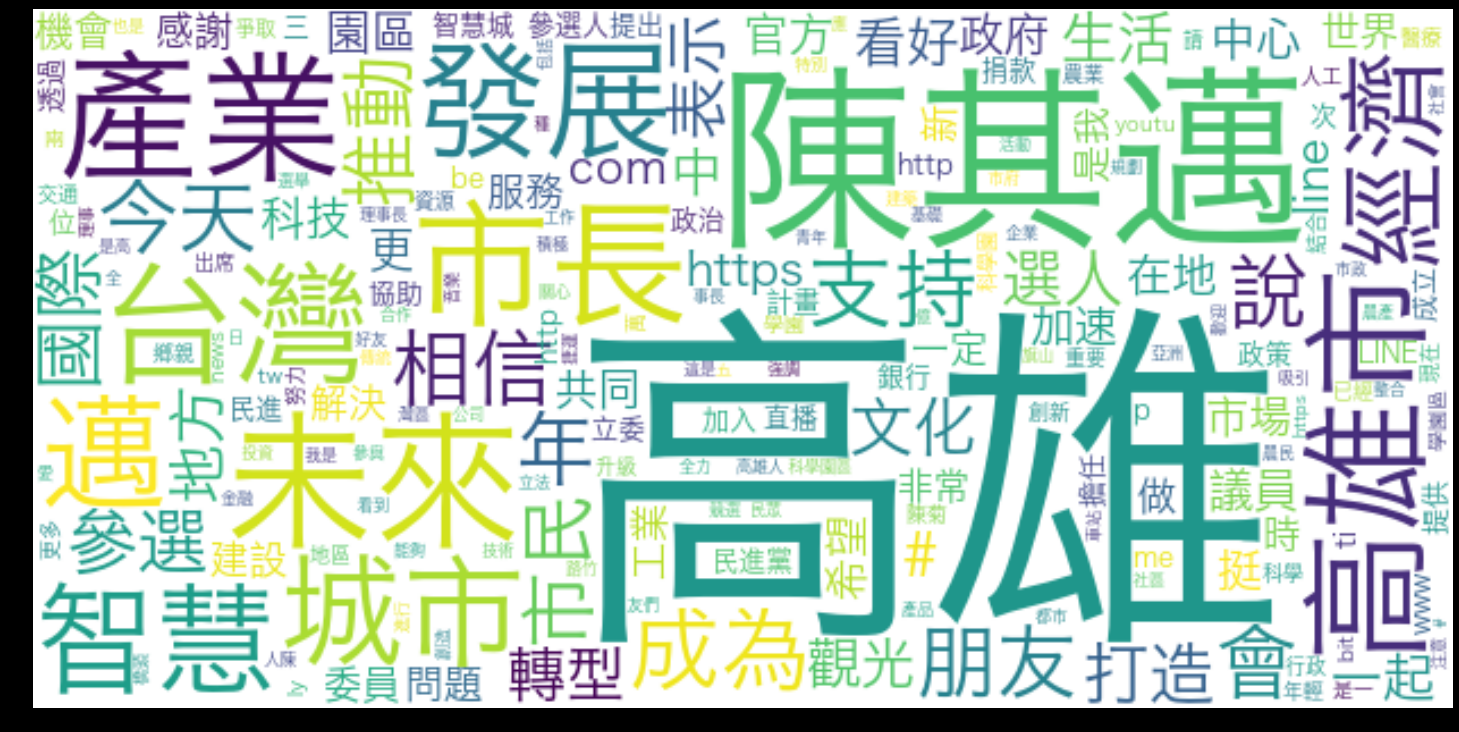

In [34]:
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()

#### 韓國瑜的文字雲

In [35]:
text_for_han=subset_han['Message']
with open('/Users/jen/Desktop/sentence_han.txt', 'w')as f:
    for i in text_for_han:
        i=i.strip('\n')
        f.write(i)

In [76]:
filename=open("/Users/jen/Desktop/sentence_han.txt")
final=""
s=filename.read()
#terms = [t for t in jieba.cut(s, cut_all=True) if t not in stops]
#sorted(Counter(terms).items(), key=lambda x:x[1], reverse=True)

['2019',
 '道',
 '曙光',
 '\n\n',
 '2019',
 '年',
 '道',
 '曙光',
 '在朝',
 '雨',
 '綿綿',
 '裡',
 '大武',
 '大武山',
 '武山',
 '山',
 '顛',
 '出發',
 '照亮',
 '市境',
 '南',
 '樹',
 '最高',
 '高枝',
 '突然',
 '想到',
 '了一',
 '句',
 '佛家',
 '語',
 '法喜',
 '充滿',
 '算不上',
 '修行',
 '行者',
 '真切',
 '感受',
 '感受到',
 '這天',
 '天地',
 '天地人',
 '人間',
 '正',
 '能量',
 '著眼',
 '眼前',
 '片',
 '滉',
 '漾',
 '浩瀚',
 '新年',
 '晨光',
 '風雨',
 '之後',
 '砥礪',
 '重生',
 '市境',
 '南',
 '樹',
 '覺得',
 '得自',
 '充滿',
 '力量',
 '希望',
 '迎向',
 '百事',
 '舉',
 '期盼',
 '奇蹟',
 '2019',
 '年',
 '\n\n',
 '感謝',
 '位',
 '我一',
 '一起',
 '迎接',
 '新年',
 '日出',
 '希望',
 '未來',
 '一年',
 '365',
 '天',
 '天天',
 '這一',
 '一樹',
 '水珠',
 '閃閃',
 '南',
 '樹',
 '曙光',
 '溫潤',
 '美好',
 '\n\n',
 '相關',
 '關新',
 '新聞',
 'https',
 'youtu',
 'be',
 'kqLseWzSzWk',
 '2019',
 '新年',
 '新',
 '希望',
 '\n\n',
 '位',
 '好朋友',
 '朋友',
 '朋友們',
 '友們',
 '2019',
 '新年',
 '快樂',
 '\n\n',
 '不知',
 '知道',
 '位',
 '2018',
 '願望',
 '完成',
 '少',
 '2019',
 '懷有',
 '什',
 '樣',
 '期待',
 '2018',
 '翻轉',
 '夢想',
 '一年',
 '更',
 '希望',
 '2019',
 '是一',
 '實現',
 '理想',
 '一年',
 '\n\n'

In [77]:
with open('/Users/jen/Desktop/sentence_han_terms.txt', 'w')as f:
    for i in terms:
        i=i.strip('\n')
        f.write(i)

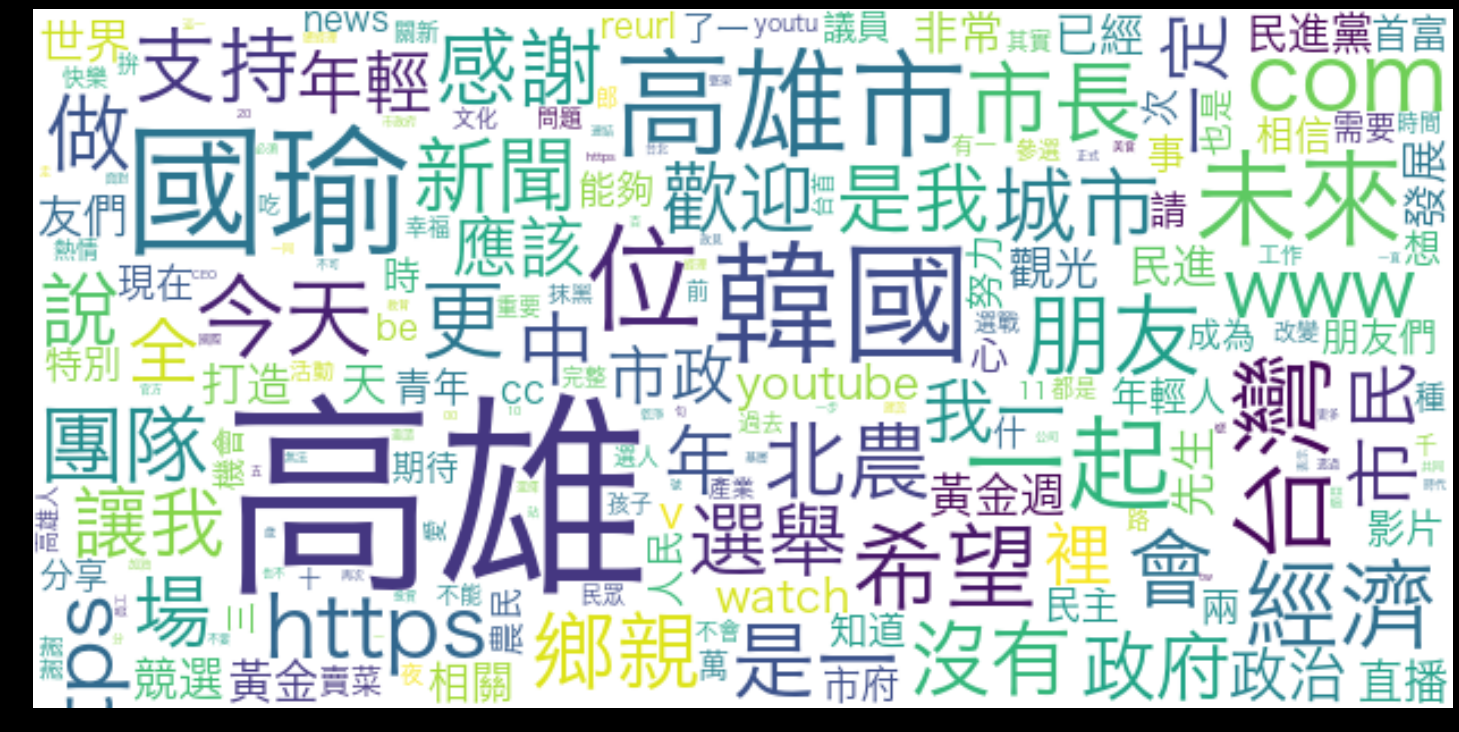

In [38]:
#字體設定
font = 'Hiragino Sans GB.ttc'
#想要文字雲出現的圖示
mask = np.array(Image.open(r"/Users/jen/Desktop/圖片 1.jpg"))
my_wordcloud = WordCloud(background_color="white",mask=mask,font_path=font,collocations=False, width=2400, height=2400, margin=2)  
my_wordcloud.generate_from_frequencies(frequencies=Counter(terms))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(my_wordcloud,interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
#顯示用
plt.show()

## 關聯分析，使用word2vec

In [98]:
import multiprocessing
import jieba
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
with open('/Users/jen/Desktop/sentence_chen.txt',encoding='utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    print("type",type(result))
    with open('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt', 'w',encoding="utf-8") as f2:
        f2.write(result)

# import logging
import os
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.LineSentence('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt')

path = get_tmpfile("word2vec.model") #創建臨時文件
model = Word2Vec(sentences, size=200, window=5, min_count=1,
                 workers=multiprocessing.cpu_count())
path = get_tmpfile("w2v_model.bin") #創建臨時文件
path1 = get_tmpfile("w2v_vector.bin") #創建臨時文件
model.save("w2v_model.bin")
model.wv.save("w2v_vector.bin")
#model.save(outp1)
#model.wv.save_word2vec_format(outp2, binary=False)
for key in model.wv.similar_by_word('中國', topn =10):
    print(key)

2019-05-08 10:55:10,269 : INFO : collecting all words and their counts
2019-05-08 10:55:10,269 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,271 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-08 10:55:10,331 : INFO : collected 13418 word types from a corpus of 134429 raw words and 5860 sentences
2019-05-08 10:55:10,332 : INFO : Loading a fresh vocabulary
2019-05-08 10:55:10,353 : INFO : effective_min_count=1 retains 13418 unique words (100% of original 13418, drops 0)
2019-05-08 10:55:10,354 : INFO : effective_min_count=1 leaves 134429 word corpus (100% of original 134429, drops 0)
2019-05-08 10:55:10,396 : INFO : deleting the raw counts dictionary of 13418 items
2019-05-08 10:55:10,397 : INFO : sample=0.001 downsamples 36 most-common words
2019-05-08 10:55:10,397 : INFO : downsampling leaves estimated 106628 word corpus (79.3% of prior 134429)
2019-05-08 10:55:10,425 : INFO : estimated required memory for 1

type <class 'str'>


2019-05-08 10:55:10,600 : INFO : training model with 4 workers on 13418 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-05-08 10:55:10,607 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,753 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 10:55:10,764 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-08 10:55:10,765 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-08 10:55:10,769 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-08 10:55:10,771 : INFO : EPOCH - 1 : training on 134429 raw words (106617 effective words) took 0.2s, 651339 effective words/s
2019-05-08 10:55:10,774 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 10:55:10,967 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 10:55:10,968 : INFO : worker thread finished; awaiting finish o

('總幹事', 0.9998046159744263)
('台北', 0.9997022151947021)
('億元', 0.9996898174285889)
('粉絲', 0.9996726512908936)
('行政院', 0.9996477961540222)
('張', 0.9996414184570312)
('棒球', 0.9996384382247925)
('後援會', 0.9996353983879089)
('教授', 0.9996349215507507)
('立法院', 0.9996339082717896)


In [110]:
import multiprocessing
import jieba
import jieba.analyse
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec
with open('/Users/jen/Desktop/sentence_han.txt',encoding='utf-8') as f:
    document = f.read()
    document_cut = jieba.cut(document)
    result = ' '.join(document_cut)
    print("type",type(result))
    with open('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt', 'w',encoding="utf-8") as f2:
        f2.write(result)

# import logging
import os
from gensim.models import word2vec
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

sentences = word2vec.LineSentence('/Users/jen/Downloads/jieba-zh_TW-master/jieba/dict.txt')

path = get_tmpfile("word2vec.model") #創建臨時文件
model = Word2Vec(sentences, size=200, window=5, min_count=1,
                 workers=multiprocessing.cpu_count())
path = get_tmpfile("w2v_model.bin") #創建臨時文件
path1 = get_tmpfile("w2v_vector.bin") #創建臨時文件
model.save("w2v_model.bin")
model.wv.save("w2v_vector.bin")
#model.save(outp1)
#model.wv.save_word2vec_format(outp2, binary=False)
for key in model.wv.similar_by_word('中國', topn =10):
    print(key)

2019-05-08 11:10:29,089 : INFO : collecting all words and their counts
2019-05-08 11:10:29,090 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,092 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-05-08 11:10:29,115 : INFO : collected 8119 word types from a corpus of 42635 raw words and 1295 sentences
2019-05-08 11:10:29,117 : INFO : Loading a fresh vocabulary
2019-05-08 11:10:29,183 : INFO : effective_min_count=1 retains 8119 unique words (100% of original 8119, drops 0)
2019-05-08 11:10:29,184 : INFO : effective_min_count=1 leaves 42635 word corpus (100% of original 42635, drops 0)
2019-05-08 11:10:29,209 : INFO : deleting the raw counts dictionary of 8119 items
2019-05-08 11:10:29,210 : INFO : sample=0.001 downsamples 34 most-common words
2019-05-08 11:10:29,211 : INFO : downsampling leaves estimated 33595 word corpus (78.8% of prior 42635)
2019-05-08 11:10:29,227 : INFO : estimated required memory for 8119 words

type <class 'str'>


2019-05-08 11:10:29,341 : INFO : training model with 4 workers on 8119 vocabulary and 200 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2019-05-08 11:10:29,343 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,379 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 11:10:29,381 : INFO : worker thread finished; awaiting finish of 2 more threads
2019-05-08 11:10:29,383 : INFO : worker thread finished; awaiting finish of 1 more threads
2019-05-08 11:10:29,387 : INFO : worker thread finished; awaiting finish of 0 more threads
2019-05-08 11:10:29,387 : INFO : EPOCH - 1 : training on 42635 raw words (33616 effective words) took 0.0s, 757040 effective words/s
2019-05-08 11:10:29,390 : WARNING : this function is deprecated, use smart_open.open instead
2019-05-08 11:10:29,428 : INFO : worker thread finished; awaiting finish of 3 more threads
2019-05-08 11:10:29,430 : INFO : worker thread finished; awaiting finish of 2

('能', 0.9979747533798218)
('著', 0.9979528188705444)
('自己', 0.99794602394104)
('今天', 0.9979404211044312)
('問題', 0.99793541431427)
('雖然', 0.9979274868965149)
('許多', 0.9979269504547119)
('和', 0.9979260563850403)
('從', 0.9979239106178284)
('就是', 0.9979168176651001)


## 結論

從文字雲看來，陳其邁的政策較韓國瑜有一致性，但也有可能是因為陳其邁的資料筆數較多。
利用關連分析，可以看出兩人在共同議題上，關心的面向是不同的。

未來希望可以拿到1124選後的資料，或許可以從文字探勘找出某候選人造成炫風的緣由。